### Exploratory analysis: data visualization

Are chicago crimes affected by the distance to the nearest police station? And are there more crimes where the roads are not lit up from streetlights?


In this notebook we will be working on three different datasets:
1. Chicago crimes between 2008-2011
2. Streetlight locations in Chicago
3. Police stations in Chicago


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import os

In [2]:
DATA_DIR = '/Users/pernillesamsoe/Documents/EPFL/Data_vis/data/'

***CHICAGO 2008-2011 DATA***

At first, we read the main data describing crimes in Chicago from 2008 to 2011:

In [3]:
chicago_2008 = pd.read_csv(DATA_DIR + 'Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False)

b'Skipping line 1149094: expected 23 fields, saw 41\n'


Examining data and the dimensions:

In [4]:
chicago_2008.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"
5,3056,4790,HP620131,10/10/2008 08:32:00 PM,015XX W 14TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,2.0,28.0,01A,1166321.0,1893492.0,2008,08/17/2015 03:03:40 PM,41.863318,-87.664924,"(41.863318307, -87.664923682)"
6,3611,4791,HP620406,10/11/2008 12:55:00 AM,020XX W 23RD ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,25.0,31.0,01A,1163192.0,1888742.0,2008,08/17/2015 03:03:40 PM,41.850350,-87.676543,"(41.850350125, -87.676543351)"
7,4425,4792,HP622040,10/11/2008 10:25:00 PM,069XX S PAXTON AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,...,5.0,43.0,01A,1192078.0,1859337.0,2008,08/17/2015 03:03:40 PM,41.769006,-87.571485,"(41.769005966, -87.571485086)"
8,5213,4793,HP622164,10/11/2008 10:00:00 PM,060XX S SAWYER AVE,0110,HOMICIDE,FIRST DEGREE MURDER,PORCH,False,...,16.0,66.0,01A,1155755.0,1864457.0,2008,08/17/2015 03:03:40 PM,41.783862,-87.704491,"(41.783861768, -87.704490821)"
9,5867,4794,HP622189,10/12/2008 05:47:00 AM,024XX W 51ST ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,...,14.0,63.0,01A,1160775.0,1870785.0,2008,08/17/2015 03:03:40 PM,41.801124,-87.685911,"(41.801124416, -87.685910818)"


In [5]:
chicago_2008.shape

(2688710, 23)

The types of the 23 columns:

In [6]:
chicago_2008.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Numerically describing all the integer/float variables:

In [7]:
chicago_2008.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.688710e+06,2.688710e+06,2.688710e+06,2.688627e+06,2.688647e+06,2.687255e+06,2.660065e+06,2.660065e+06,2.688710e+06,2.660065e+06,2.660065e+06
mean,1.563305e+06,7.101744e+06,1.206917e+03,1.136992e+01,2.269217e+01,3.794003e+01,1.164309e+06,1.885184e+06,2.009206e+03,4.184054e+01,-8.767257e+01
std,4.243902e+05,6.777315e+05,7.063586e+02,6.952451e+00,1.372523e+01,2.165920e+01,1.873467e+04,3.495569e+04,1.029081e+00,9.626146e-02,6.731845e-02
min,3.880000e+02,4.379000e+03,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.008000e+03,3.661945e+01,-9.168657e+01
25%,1.211310e+06,6.556011e+06,6.240000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152696e+06,1.858578e+06,2.008000e+03,4.176728e+01,-8.771471e+01
50%,1.547398e+06,7.089937e+06,1.111000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.165745e+06,1.889560e+06,2.009000e+03,4.185265e+01,-8.766704e+01
75%,1.883489e+06,7.606936e+06,1.732000e+03,1.700000e+01,3.400000e+01,5.800000e+01,1.176264e+06,1.909531e+06,2.010000e+03,4.190754e+01,-8.762891e+01
max,6.254077e+06,1.082723e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951511e+06,2.011000e+03,4.202255e+01,-8.752453e+01


In [8]:
null_columns=chicago_2008.columns[chicago_2008.isnull().any()]
chicago_2008[null_columns].isnull().sum()

Case Number                 6
Location Description      291
District                   83
Ward                       63
Community Area           1455
X Coordinate            28645
Y Coordinate            28645
Latitude                28645
Longitude               28645
Location                28645
dtype: int64

In [9]:
#print(chicago_2008[chicago_2008["Latitude"].isnull()][null_columns])

Out of 2688710 rows, 28645 includes NaNs for the locations. Since the whole task will be evolving location data and distances, we see no other choice than to drop these since they cannot be imputed. For the rest of data the NaNs are kept for now, since the NaNs will play no role at this point in time being in the meta data:

In [10]:
chicago_2008 = chicago_2008.dropna(subset=['Latitude', 'Longitude'])
chicago_2008.shape

(2660065, 23)

In [11]:
chicago_2008["Latitude"].unique()

array([41.75827586, 41.87025207, 41.77099048, ..., 41.68503468,
       41.69054684, 41.86010116])

In [12]:
chicago_2008.describe(include=[np.object])

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Updated On,Location
count,2660059,2660065,2660065,2660065,2660065,2660065,2659832,2660065,2660065,2660065
unique,1525471,569101,32058,353,28,330,134,26,66,385309
top,HP296582,01/01/2008 12:01:00 AM,100XX W OHARE ST,0486,THEFT,SIMPLE,STREET,06,02/04/2016 06:33:39 AM,"(41.976290414, -87.905227221)"
freq,5,332,5710,226475,550516,270267,677469,550516,2658155,5710


In [13]:
chicago_2008["Primary Type"].unique()

array(['HOMICIDE', 'BATTERY', 'THEFT', 'ASSAULT', 'STALKING', 'ARSON',
       'ROBBERY', 'NARCOTICS', 'BURGLARY', 'WEAPONS VIOLATION',
       'OTHER OFFENSE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'MOTOR VEHICLE THEFT', 'SEX OFFENSE', 'LIQUOR LAW VIOLATION',
       'PUBLIC PEACE VIOLATION', 'DECEPTIVE PRACTICE',
       'CRIM SEXUAL ASSAULT', 'OFFENSE INVOLVING CHILDREN',
       'PROSTITUTION', 'GAMBLING', 'INTERFERENCE WITH PUBLIC OFFICER',
       'INTIMIDATION', 'KIDNAPPING', 'OBSCENITY', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION'], dtype=object)

***STREETLIGHTS IN CHICAGO DATA***

We now read in the streetlights data in order to preprocess this accordingly as well:

In [14]:
streetlights = pd.read_csv(DATA_DIR + 'Map_of_Street_Lights.csv')

In [15]:
streetlights.head()

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,Street Address,ZIP Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,1/1/11,Completed - Dup,1/1/11,11-00003036,Street Lights - All/Out,5143 S KENNETH AVE,60632.0,1147567.430,1870111.208,41.799538,-87.734365,"(41.799538203122005, -87.73436542052076)"
1,1/1/11,Completed - Dup,1/2/11,11-00003203,Street Lights - All/Out,5400 S SAWYER AVE,60632.0,1155631.685,1868632.133,41.795321,-87.704831,"(41.795321405681925, -87.704831037907)"
2,1/1/11,Completed - Dup,1/2/11,11-00003443,Street Lights - All/Out,1162 W 20TH PL,60608.0,1168968.306,1890237.390,41.854330,-87.655300,"(41.854330415047066, -87.65530003165237)"
3,1/1/11,Completed - Dup,1/3/11,11-00000585,Street Lights - All/Out,736 E 92ND ST,60619.0,1182750.308,1844133.281,41.727507,-87.606146,"(41.72750696638104, -87.60614646759406)"
4,1/1/11,Completed - Dup,1/3/11,11-00001199,Street Lights - All/Out,1701 W 43RD ST,60609.0,1165717.320,1876188.554,41.815849,-87.667632,"(41.81584880428669, -87.66763204691361)"


In [16]:
streetlights.shape

(294646, 12)

In [17]:
streetlights.describe(include=[np.object])

,Creation Date,Status,Completion Date,Service Request Number,Type of Service Request,Street Address,Location
count,294646,294646,294525,294646,294646,294644,294485
unique,2903,4,2794,294458,1,109880,101122
top,10/24/11,Completed - Dup,10/5/11,13-01289061,Street Lights - All/Out,8300 S YATES BLVD,"(41.7444613173406, -87.56612547505442)"
freq,613,149337,743,3,294646,185,206


In [18]:
null_columns=streetlights.columns[streetlights.isnull().any()]
streetlights[null_columns].isnull().sum()

Completion Date    121
Street Address       2
ZIP Code           604
X Coordinate       161
Y Coordinate       161
Latitude           161
Longitude          161
Location           161
dtype: int64

Same as before, we observe 161 critical missing values since these are for the locations. The ZIP code can be imputed from the location, same for street address, whereas completion date is irrelevant for our project:

In [19]:
streetlights = streetlights.dropna(subset=['Latitude', 'Longitude'])
streetlights.shape

(294485, 12)

https://stackoverflow.com/questions/44446862/calculate-distance-between-latitude-and-longitude-in-dataframe

https://stackoverflow.com/questions/47534715/get-nearest-point-from-each-other-in-pandas-dataframe

***POLICESTATIONS IN CHICAGO DATA***

Same as before, we will read in the data for the policestations and do explorative analysis on this dataset:

In [20]:
policestations = pd.read_csv(DATA_DIR + 'police-stations.csv')

In [21]:
policestations.head()

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,1,Central,1718 S State St,Chicago,IL,60616,{'url': 'http://home.chicagopolice.org/communi...,312-745-4290,312-745-3694,312-745-3693,1176569.052,1891771.704,41.858373,-87.627356,"{'needs_recoding': False, 'longitude': '-87.62..."
1,2,Wentworth,5101 S Wentworth Ave,Chicago,IL,60609,{'url': 'http://home.chicagopolice.org/communi...,312-747-8366,312-747-5396,312-747-6656,1175864.837,1871153.753,41.801811,-87.630560,"{'needs_recoding': False, 'longitude': '-87.63..."
2,3,Grand Crossing,7040 S Cottage Grove Ave,Chicago,IL,60637,{'url': 'http://home.chicagopolice.org/communi...,312-747-8201,312-747-5479,312-747-9168,1182739.183,1858317.732,41.766431,-87.605748,"{'needs_recoding': False, 'longitude': '-87.60..."
3,4,South Chicago,2255 E 103rd St,Chicago,IL,60617,{'url': 'http://home.chicagopolice.org/communi...,312-747-7581,312-747-5276,312-747-9169,1193131.299,1837090.265,41.707933,-87.568349,"{'needs_recoding': False, 'longitude': '-87.56..."
4,5,Calumet,727 E 111th St,Chicago,IL,60628,{'url': 'http://home.chicagopolice.org/communi...,312-747-8210,312-747-5935,312-747-9170,1183305.427,1831462.313,41.692723,-87.604506,"{'needs_recoding': False, 'longitude': '-87.60..."


In [22]:
policestations.shape

(23, 15)

In [23]:
policestations.describe(include=[np.object])

,DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,WEBSITE,PHONE,FAX,TTY,LOCATION
count,23,23,23,23,23,23,22,22,22,23
unique,23,23,23,1,1,23,22,22,22,23
top,2,Grand Crossing,3120 S Halsted St,Chicago,IL,{'url': 'http://home.chicagopolice.org/communi...,312-745-3617,312-747-5396,312-744-8011,"{'needs_recoding': False, 'longitude': '-87.70..."
freq,1,1,1,23,23,1,1,1,1,1


In [24]:
null_columns=policestations.columns[policestations.isnull().any()]
policestations[null_columns].isnull().sum()

PHONE    1
FAX      1
TTY      1
dtype: int64

We observe no critical null-values in the police-station dataset and therefore we proceed:

In [25]:
from geopy.distance import vincenty

In [26]:
# Define the two points
start = ((41.758275857, -87.622451031))
stop = (41.858373, -87.627356)

# Print the vincenty distance
print(vincenty(start, stop).meters)

# Print the great circle distance
#print(great_circle(start, stop).meters)

11125.215076582237


**Compute distrance matrix between crimes and police stations**

In [27]:
mat = sp.spatial.distance.cdist(chicago_2008[['Latitude','Longitude']], 
                              policestations[['LATITUDE','LONGITUDE']], metric='euclidean')

In [28]:
mat.shape

(2660065, 23)

In [29]:
mat

array([[0.10021685, 0.04428402, 0.01858764, ..., 0.24638358, 0.21492092,
        0.07243199],
       [0.11930609, 0.13426295, 0.17455361, ..., 0.14953271, 0.05214242,
        0.12889199],
       [0.11293522, 0.07496961, 0.09326513, ..., 0.23042914, 0.16197681,
        0.0962632 ],
       ...,
       [0.09789081, 0.05009864, 0.00993373, ..., 0.24593996, 0.22845662,
        0.07060662],
       [0.08180648, 0.09784278, 0.13951688, ..., 0.14469251, 0.08128659,
        0.09064891],
       [0.08723954, 0.03102502, 0.0334045 , ..., 0.23021155, 0.19397587,
        0.06078693]])

In [30]:
mat_df = pd.DataFrame(mat, columns=policestations['DISTRICT NAME']) 

In [31]:
mat_df.head()

DISTRICT NAME,Central,Wentworth,Grand Crossing,South Chicago,Calumet,Gresham,Englewood,Chicago Lawn,Deering,Ogden,...,Austin,Jefferson Park,Albany Park,Near North,Town Hall,Lincoln,Morgan Park,Rogers Park,Grand Central,Headquarters
0,0.100217,0.044284,0.018588,0.073901,0.067964,0.022627,0.043970,0.088860,0.082666,0.130646,...,0.189947,0.259281,0.233101,0.146465,0.191344,0.232201,0.081180,0.246384,0.214921,0.072432
1,0.119306,0.134263,0.174554,0.240690,0.227061,0.155957,0.124371,0.098557,0.104938,0.040055,...,0.024216,0.105766,0.097469,0.107885,0.122037,0.121568,0.194909,0.149533,0.052142,0.128892
2,0.112935,0.074970,0.093265,0.144983,0.122622,0.057832,0.038984,0.012775,0.084647,0.086217,...,0.129242,0.213947,0.197238,0.143444,0.182664,0.208647,0.085159,0.230429,0.161977,0.096263
3,0.135041,0.157310,0.198732,0.265871,0.253468,0.182166,0.150324,0.125664,0.124975,0.062132,...,0.018373,0.079664,0.076913,0.114310,0.118144,0.106417,0.222030,0.135627,0.025076,0.148558
4,0.083809,0.089772,0.129755,0.196219,0.184224,0.112778,0.080763,0.064847,0.063811,0.012947,...,0.068660,0.141896,0.123578,0.089207,0.118895,0.136790,0.157908,0.160636,0.093235,0.087488


In [98]:
chicago_2008.shape

(2660065, 24)

In [32]:
chicago_2008['min_distance2police'] = mat_df.min(axis=1)

In [33]:
chicago_2008.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,min_distance2police
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)",0.018588
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)",0.024216
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)",0.012775
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)",0.018373
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)",0.012947


In [34]:
chicago_2008["min_distance2police"].median()

0.01941120961499001

All of the distances are created as the eucledian distance measured in coordinates. To gain a reference point 0.2 will be around 22 km to nearest police station, and 0.02 (which is the median of distances) will be around 3 km. This also raises the awareness around how important a very little difference in distance might do. 

***EXPLORATIVE PLOTTING FOR POLICESTATION DATA***

A basic plot if the distances to closest policestation:

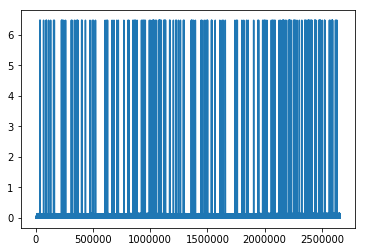

In [35]:
plt.plot(chicago_2008['min_distance2police'])

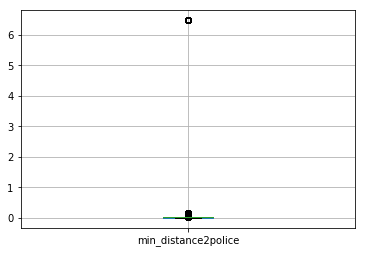

In [36]:
chicago_2008.boxplot(column='min_distance2police')

Could look like we have some outliers with an euclidean distance of more than 6. If we remove this one, we see the following:

In [37]:
chicago_2008_subset = chicago_2008.loc[chicago_2008['min_distance2police'] < 6]

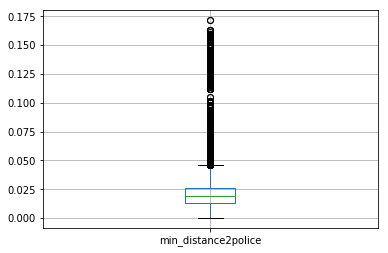

In [38]:
chicago_2008_subset.boxplot(column='min_distance2police')

Before omitting these, lets examine how many it is:

In [39]:
chicago_2008.shape[0]-chicago_2008_subset.shape[0]

27402

27402 incidents are located very far away from any police stations. Lets examine these alone in a boxplot:

In [40]:
chicago_2008_subset2 = chicago_2008.loc[chicago_2008['min_distance2police'] > 6]

In [41]:
chicago_2008_subset2.shape

(168, 24)

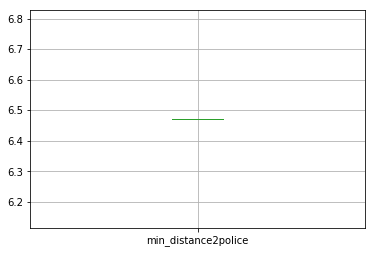

In [42]:
chicago_2008_subset2.boxplot(column='min_distance2police')

Seems like all of these values are actually outliers. We will handle these in a certain way.
For now we will continue with the crimes that are all below an euclidean distance to policestation of 6:

chicago_2008_subset.boxplot(column='min_distance2police', by='Arrest')

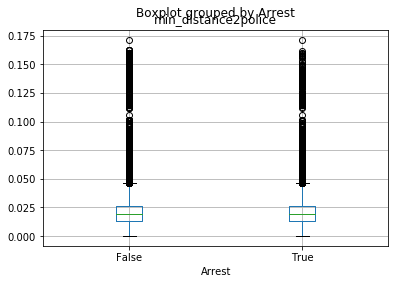

In [43]:
chicago_2008_subset.boxplot(column='min_distance2police', by='Arrest')

Examining which other categorical variables could add value to a boxplot:

In [44]:
chicago_2008_subset.describe(include=[np.object])

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Updated On,Location
count,2632657,2632663,2632663,2632663,2632663,2632663,2632448,2632663,2632663,2632663
unique,1498275,560273,32004,351,28,328,117,25,5,382150
top,HR180267,01/01/2008 12:01:00 AM,100XX W OHARE ST,0486,THEFT,SIMPLE,STREET,06,02/04/2016 06:33:39 AM,"(41.976290414, -87.905227221)"
freq,3,332,5710,224585,543595,268288,671510,543595,2632324,5710


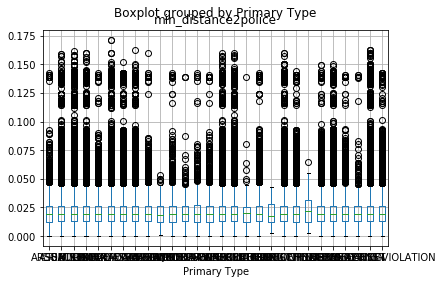

In [45]:
chicago_2008_subset.boxplot(column='min_distance2police', by='Primary Type')

Maybe it does not make sense to use all types of crimes. Theft, liquoir law crime, etc will always happen in the centers and thereby close to police stations. Let us investigate `KIDNAPPING`.

In [46]:
chicago_2008_kidnap = chicago_2008_subset.loc[chicago_2008_subset['Primary Type'] == 'KIDNAPPING']

In [47]:
chicago_2008_kidnap.shape

(2142, 24)

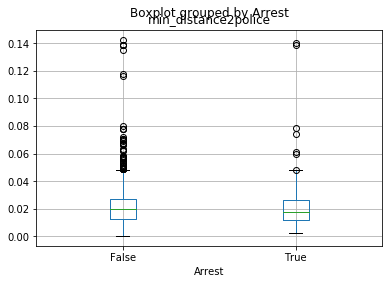

In [48]:
chicago_2008_kidnap.boxplot(column='min_distance2police', by='Arrest')

The boxplot mostly tells us about how the distances are distributed. From this we can conclude that the median for `no arrest` within kidnapping is around 0.02 euclidean distance and that for `arrest` it is marginally lower. 

***TESTING OF POLICE STATION DISTANCES***

Let us now test whether there are more crimes in the distances further away from police stations.
First we will aggregate the amount of crimes in categories of distances. As we saw in the beginning, very small changes to the eucledian distance can make a change in the real-life distances. 

In [49]:
columns = ['Distance Interval Low','Distance Interval High', 'Sum']
aggDF = pd.DataFrame(columns=columns)
aggDF = aggDF.fillna(0) # with 0s rather than NaNs
j = 0
k = 0.01
listLow = np.ones(20)
listHigh = np.ones(20)
for i in range(20):
    listLow[i] = j
    j += 0.01
for i in range(20):
    listHigh[i] = k
    k += 0.01
aggDF['Distance Interval Low'] = listLow
aggDF['Distance Interval High'] = listHigh


In [50]:
aggDF

,Distance Interval Low,Distance Interval High,Sum
0,0.00,0.01,NaN
1,0.01,0.02,NaN
2,0.02,0.03,NaN
3,0.03,0.04,NaN
4,0.04,0.05,NaN
5,0.05,0.06,NaN
6,0.06,0.07,NaN
7,0.07,0.08,NaN
8,0.08,0.09,NaN
9,0.09,0.10,NaN


In [51]:
chicago_2008_random = chicago_2008_subset.sample(frac=0.05, replace=False)

In [52]:
chicago_2008_random.shape

(131633, 24)

In [53]:
Sum = len(chicago_2008_random[(chicago_2008_random["min_distance2police"] >= 0) & 
                          (chicago_2008_random["min_distance2police"] < 0.1)])

In [54]:
Sum

131154

In [55]:
listSum = np.ones(20)
for i in range(20):
    Sum = len(chicago_2008_random[(chicago_2008_random["min_distance2police"] >= aggDF["Distance Interval Low"][i]) & (chicago_2008_random["min_distance2police"] < aggDF["Distance Interval High"][i])])
    listSum[i] = Sum
    #print(Sum)
aggDF['Sum'] = listSum

In [56]:
aggDF

,Distance Interval Low,Distance Interval High,Sum
0,0.00,0.01,21847.0
1,0.01,0.02,47594.0
2,0.02,0.03,40489.0
3,0.03,0.04,14867.0
4,0.04,0.05,4268.0
5,0.05,0.06,907.0
6,0.06,0.07,468.0
7,0.07,0.08,484.0
8,0.08,0.09,179.0
9,0.09,0.10,51.0


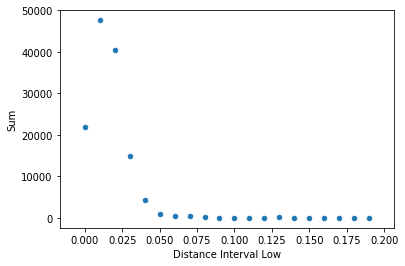

In [57]:
aggDF.plot.scatter(x='Distance Interval Low',y='Sum')

This scatterplot show us the same picture as the boxplot - BUT there is two additionally informations extracted from this.

- Within very small distances 0.00 to 0.02 it can be seen that there are more crimes further away than just next to the police station. 
- This plot is actually showing the populationdensity. This should either be adjusted for or the plot should be corrigated to only show within a range where the density of people is comparable. 

We will now make the intervals shorter and work within 0-0.2 range.

In [58]:
c = ['Distance Interval Low','Distance Interval High', 'Sum']
aggDF_ = pd.DataFrame(columns=c)
aggDF_ = aggDF_.fillna(0) # with 0s rather than NaNs
j = 0
k = 0.001
listLow_ = np.ones(20)
listHigh_ = np.ones(20)
for i in range(20):
    listLow_[i] = j
    j += 0.001
for i in range(20):
    listHigh_[i] = k
    k += 0.001
aggDF_['Distance Interval Low'] = listLow_
aggDF_['Distance Interval High'] = listHigh_

In [59]:
aggDF_

,Distance Interval Low,Distance Interval High,Sum
0,0.000,0.001,NaN
1,0.001,0.002,NaN
2,0.002,0.003,NaN
3,0.003,0.004,NaN
4,0.004,0.005,NaN
5,0.005,0.006,NaN
6,0.006,0.007,NaN
7,0.007,0.008,NaN
8,0.008,0.009,NaN
9,0.009,0.010,NaN


In [60]:
listSum_ = np.ones(20)
for i in range(20):
    Sum_ = len(chicago_2008_random[(chicago_2008_random["min_distance2police"] >= aggDF_["Distance Interval Low"][i]) & (chicago_2008_random["min_distance2police"] < aggDF_["Distance Interval High"][i])])
    listSum_[i] = Sum_
    #print(Sum)
aggDF_['Sum'] = listSum_

In [61]:
aggDF_

,Distance Interval Low,Distance Interval High,Sum
0,0.000,0.001,545.0
1,0.001,0.002,704.0
2,0.002,0.003,1263.0
3,0.003,0.004,1675.0
4,0.004,0.005,2048.0
5,0.005,0.006,2343.0
6,0.006,0.007,2699.0
7,0.007,0.008,3265.0
8,0.008,0.009,3545.0
9,0.009,0.010,3760.0


best linear fit:
y = 982.9 + 262014.3x


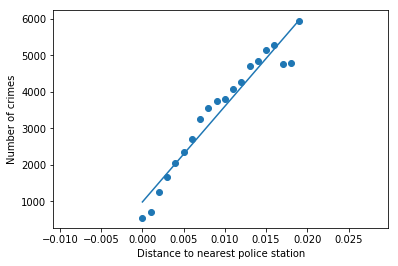

In [62]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best linear fit:\ny = {:.1f} + {:.1f}x'.format(a, b))

    return a, b

a, b = best_fit(aggDF_['Distance Interval Low'], aggDF_['Sum'])


plt.scatter(aggDF_['Distance Interval Low'], aggDF_['Sum'])
plt.xlabel('Distance to nearest police station')
plt.ylabel('Number of crimes')
yfit = [a + b * xi for xi in aggDF_['Distance Interval Low']]
plt.plot(aggDF_['Distance Interval Low'], yfit)

#aggDF_.plot.scatter(x='Distance Interval Low',y='Sum')

As described in the beginning this can be seen as a test with the null-hypothesis of no positive correlation between the distance to police station and the number of crimes. Since the slope of our simple linear regression is 267.380,5 > 0 we can reject our null-hypothesis of no correlation. 

This is precise what we wanted to show: there are more crimes "further away" from the police station than near them. Since short and long distances are relative we chose to set a threshold at the eucledian distance of 0.02 which is around 3km away. 

**Create distance matrix for streetlights**

In [65]:
streetlights.shape

(294485, 12)

To limit the calculations we will focus on the ZIP codes in the southers suburbs of Chicago:

Zip codes: 60615,60609,(60605)

In [75]:
#streetlights_subset = streetlights.loc[(streetlights['ZIP Code'] == 60615.0) | (streetlights['ZIP Code'] == 60609.0)]
streetlights_subset = streetlights.loc[(streetlights['ZIP Code'] == 60615.0)]

In [76]:
streetlights_subset.shape

(3206, 12)

We have to subset the Chicago crime in the same way as the streetlights in order to not draw wrong statistical conclusions. Since the Chicago data does not include Zip Codes, we have to find the corresponding comunity area. The comunity is Hyde Park and the numerical code is 41. 

In [114]:
chicago_2008_random_41 = chicago_2008.loc[(chicago_2008['Community Area'] == 41.0)]

In [118]:
chicago_2008_random_41.shape

(14931, 24)

In [119]:
distance_mat = sp.spatial.distance.cdist(chicago_2008_random_41[['Latitude','Longitude']], streetlights_subset[['Latitude','Longitude']], metric='euclidean')

In [120]:
distance_mat

array([[0.02041447, 0.01384171, 0.01388957, ..., 0.01179071, 0.01176609,
        0.0241942 ],
       [0.00507762, 0.00320252, 0.00363736, ..., 0.01315952, 0.01313289,
        0.01024471],
       [0.0222002 , 0.01707488, 0.01733788, ..., 0.0188257 , 0.0187966 ,
        0.02731113],
       ...,
       [0.00149958, 0.00690403, 0.00716229, ..., 0.01659505, 0.01657252,
        0.00759445],
       [0.0273792 , 0.02196284, 0.02218254, ..., 0.02216968, 0.02214408,
        0.03233354],
       [0.0273792 , 0.02196284, 0.02218254, ..., 0.02216968, 0.02214408,
        0.03233354]])

In [121]:
distance_mat.shape

(14931, 3206)

In [123]:
chicago_2008_random_41.shape

(14931, 24)

In [124]:
distmat_df = pd.DataFrame(distance_mat) 

In [125]:
l = distmat_df.min(axis=1)

In [130]:
#chicago_2008_random['min_distance2streetlight'] = distmat_df.min(axis=1)
chicago_2008_random_41['min_distance2streetlight'] = l.values

/Users/pernillesamsoe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [128]:
pd.set_option('display.max_columns', 40)
chicago_2008_random_41.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,min_distance2police,min_distance2streetlight
87,53369,4871,HP737737,12/17/2008 03:45:00 AM,016XX E 53RD ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,2132,2.0,5.0,41.0,01A,1188037.0,1870446.0,2008,08/17/2015 03:03:40 PM,41.799587,-87.585943,"(41.799587196, -87.585943259)",0.018949,0.000162
275,166538,5061,HR372962,06/13/2009 09:12:00 AM,054XX S ELLIS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,False,True,2131,2.0,5.0,41.0,01A,1183866.0,1869676.0,2009,08/17/2015 03:03:40 PM,41.797573,-87.601263,"(41.797572754, -87.601263259)",0.029722,0.000240
6943,819949,6925892,HR329432,05/19/2009 12:00:00 PM,016XX E MUSEUM DR,0870,THEFT,POCKET-PICKING,OTHER,False,False,331,3.0,5.0,41.0,06,1188302.0,1867578.0,2009,02/04/2016 06:33:39 AM,41.791711,-87.585063,"(41.791710871, -87.585063)",0.013199,0.003518
8239,821496,7099663,HR507863,08/28/2009 01:25:00 AM,051XX S HARPER AVE,0810,THEFT,OVER $500,STREET,False,False,234,2.0,4.0,41.0,06,1187157.0,1871298.0,2009,02/04/2016 06:33:39 AM,41.801946,-87.589143,"(41.801946097, -87.58914335)",0.010288,0.000002
9264,822746,7264992,HR581319,10/10/2009 02:00:00 PM,016XX E MUSEUM DR,0810,THEFT,OVER $500,OTHER,False,False,331,3.0,5.0,41.0,06,1188302.0,1867578.0,2009,02/04/2016 06:33:39 AM,41.791711,-87.585063,"(41.791710871, -87.585063)",0.018188,0.003518


***Exploratory plotting for streetlights***

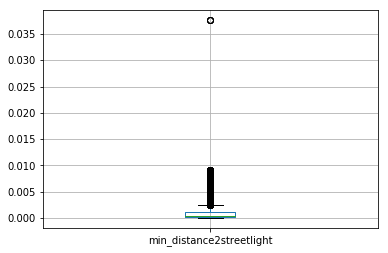

In [131]:
chicago_2008_random_41.boxplot(column='min_distance2streetlight')

We see the exact same problem as before with the outlier. Lets subset data and look at the distribution:

In [133]:
chicago_2008_random_41_ = chicago_2008_random_41.loc[chicago_2008_random_41['min_distance2streetlight'] < 0.035]

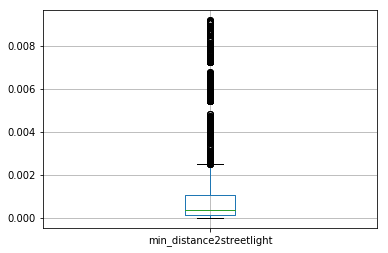

In [134]:
chicago_2008_random_41_.boxplot(column='min_distance2streetlight')

***TESTING OF STREETLIGHT DISTANCES***

Let us now test whether there are more crimes in the distances further away from street lights.


In [135]:
columns = ['Distance Interval Low','Distance Interval High', 'Sum']
aggDFs = pd.DataFrame(columns=columns)
aggDFs = aggDFs.fillna(0) # with 0s rather than NaNs
j = 0
k = 0.0001
listLow = np.ones(20)
listHigh = np.ones(20)
for i in range(20):
    listLow[i] = j
    j += 0.0001
for i in range(20):
    listHigh[i] = k
    k += 0.0001
aggDFs['Distance Interval Low'] = listLow
aggDFs['Distance Interval High'] = listHigh

In [136]:
aggDFs

,Distance Interval Low,Distance Interval High,Sum
0,0.0000,0.0001,NaN
1,0.0001,0.0002,NaN
2,0.0002,0.0003,NaN
3,0.0003,0.0004,NaN
4,0.0004,0.0005,NaN
5,0.0005,0.0006,NaN
6,0.0006,0.0007,NaN
7,0.0007,0.0008,NaN
8,0.0008,0.0009,NaN
9,0.0009,0.0010,NaN


In [137]:
listSum_ = np.ones(20)
for i in range(20):
    Sum_ = len(chicago_2008_random_41_[(chicago_2008_random_41_["min_distance2streetlight"] >= aggDFs["Distance Interval Low"][i]) & (chicago_2008_random_41_["min_distance2streetlight"] < aggDFs["Distance Interval High"][i])])
    listSum_[i] = Sum_
    #print(Sum)
aggDFs['Sum'] = listSum_

In [138]:
aggDFs

,Distance Interval Low,Distance Interval High,Sum
0,0.0000,0.0001,3031.0
1,0.0001,0.0002,2115.0
2,0.0002,0.0003,1560.0
3,0.0003,0.0004,1119.0
4,0.0004,0.0005,1260.0
5,0.0005,0.0006,763.0
6,0.0006,0.0007,553.0
7,0.0007,0.0008,342.0
8,0.0008,0.0009,254.0
9,0.0009,0.0010,136.0


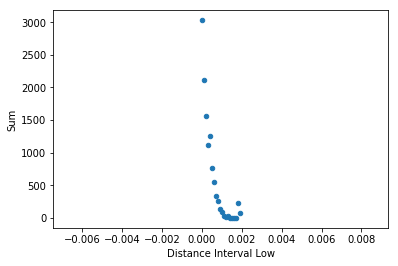

In [139]:
aggDFs.plot.scatter(x='Distance Interval Low',y='Sum')

We do not quite see the same pattern for streetlights as we do for police stations. Maybe this makes sense since a possible correlation would not make a causation. Were there are streetlights, there are also more people, and therefore more crimes. In order to get the true picture we would have to take into account the density of people in the different areas. 

***OVERALL EXPLORATIVE ANALYSIS***



We are, for this project, working with three different datasets: general crime in Chicago from 2008-2011, policestations locations in the same period, and streetlights for the same period. This notebook goes through the desciptive analysis containing the examination of data shapes, types, and missing values. As an example we removed all missing values found in any of the location variables of all three datasets, since this would not be possible to impute. Furthermore, explorative plotting is done in order to get a greater insight into data.  An early conclusion from looking at the boxplots is that there are no clear difference between ’arrest’ and ’no arrest’ based on distance to nearest police station. The same is concluded for streetlights. 
More importantly, we tested whether there was statistical evidence showing that more crimes would occur further away from police stations and streetlights.
- Policestations: It was found in the statistical test that small or big distances are relative, and we therefore chose our threshold to be the median of the dataset: 0.02. In the range of 0-0.02 a clear trend showed that high distances from nearest police station was positive correlation with the number of crimes.
- Streetlights: The same analysis was carried out for streetlights, but did not result in the same conclusion. The main reason behind this is that we did not account for the population density. 

Future work for this project will include finishing the statistical tests to back up our data visualization story with. For the data visualization tasks we will focus on two visualizations:
1. a tree map showing a breakdown of crimes
2. mapping the crimes with interactive timeline

The first visualization will be done since we have around 328 categories for crime and we need to limit these into a reasonable amount. A good way of telling this story is by a tree map.

*********




Helping code for location analysis 

In [64]:
from scipy.spatial import distance
coords = [(35.0456, -85.2672),
          (35.0524, -85.2491),
          (35.9728, -83.9422),         
          (36.1667, -86.7833)]
distance.cdist(coords, coords, 'euclidean')

array([[0.        , 0.0193352 , 1.6171966 , 1.88558331],
       [0.0193352 , 0.        , 1.59847545, 1.896163  ],
       [1.6171966 , 1.59847545, 0.        , 2.84770898],
       [1.88558331, 1.896163  , 2.84770898, 0.        ]])